In [1]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

from matplotlib import pylab as plt
import scipy.stats

import os, sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from project.data.make_steps import make_data_dict, step_detection

In [2]:
data_dict1 = make_data_dict('00010100_s001_t000')
data_dict2 = make_data_dict('00010102_s001_t000')
steps1 = step_detection(data_dict1, 'FP1')
steps2 = step_detection(data_dict2, 'FP1')
step1 = steps1[0]
step2 = steps2
data1 = data_dict1['FP1'][step1[0]:step1[1] - 10000]
data2 = data_dict2['FP1'][step2[0]:step2[1]]
print(data1, data2)

[ 3.84556184e-05  3.67771529e-05  3.40305730e-05 ... -2.28846657e-05
 -2.33424290e-05 -2.05958491e-05] [7.06516381e-05 7.58396223e-05 7.69077367e-05 ... 3.50000000e-09
 3.50000000e-09 3.50000000e-09]


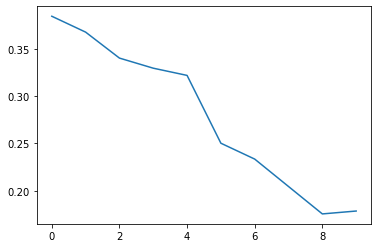

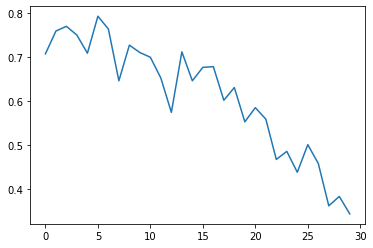

[0.38455618 0.36777153 0.34030573 0.32962459 0.3219952  0.25027894
 0.23349429 0.20450261 0.17551094 0.17856269] [0.70651638 0.75839622 0.76907737 0.74924096 0.70804226 0.79196553
 0.76297386 0.64548127 0.72635279 0.70956814 0.69888699 0.65158478
 0.57376502 0.71109401 0.64548127 0.67599883 0.6775247  0.60123082
 0.6302225  0.55240273 0.58444616 0.55850624 0.46695358 0.48526411
 0.4379619  0.50052289 0.45779831 0.36166802 0.38303031 0.34335749]


In [93]:
#data11 = (data1 * np.power(10, 4))[::10000]
#data22 = (data2 * np.power(10, 4))[::10000]
data11 = (data1[:10])*np.power(10,4)
data22 = (data2[:30])*np.power(10,4)
plt.plot(data11)
plt.show()
plt.plot(data22)
plt.show()
print(data11, data22)

In [45]:
tfd = tfp.distributions

num_states = 10

initial_distribution = tfd.Categorical(probs=np.ones(shape=[num_states]))

daily_change_prob = 0.7
transition_probs = daily_change_prob / (num_states-1) * np.ones([num_states, num_states], dtype=np.float32)
np.fill_diagonal(transition_probs,1-daily_change_prob)
#transition_probs[0] = np.zeros(num_states)
#transition_probs[0][0] = 1
#transition_probs[-1] = np.flip(transition_probs[0])

print("Initial state:\n{}".format(initial_distribution))
print("Transition matrix:\n{}".format(transition_probs))

transition_distribution = tfd.Categorical(probs=transition_probs)

Initial state:
tfp.distributions.Categorical("Categorical", batch_shape=[], event_shape=[], dtype=int32)
Transition matrix:
[[0.3        0.07777778 0.07777778 0.07777778 0.07777778 0.07777778
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.3        0.07777778 0.07777778 0.07777778 0.07777778
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.3        0.07777778 0.07777778 0.07777778
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.07777778 0.3        0.07777778 0.07777778
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.07777778 0.07777778 0.3        0.07777778
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.07777778 0.07777778 0.07777778 0.3
  0.07777778 0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.07777778 0.07777778 0.07777778 0.07777778
  0.3        0.07777778 0.07777778 0.07777778]
 [0.07777778 0.07777778 0.07777778 0.07777778 0.07777778 0.07777778
  0.077777

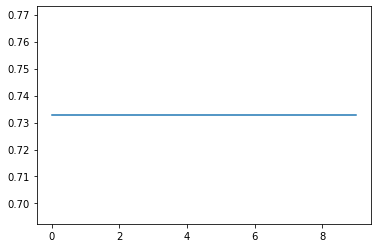

In [46]:
observation_distribution = tfd.Normal(
    loc=data22.astype('float32'),
    scale=np.zeros(shape=[num_states], dtype='float32')
)

hmm = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=len(data11)
)

hmm.mean()
plt.plot(hmm.mean())
plt.show()

In [33]:
hmm.log_prob(tf.zeros(shape=[num_states]))

<tf.Tensor: shape=(), dtype=float32, numpy=-9.597612>

In [9]:
hmm.posterior_mode(np.array(data11,dtype='float32'))

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [48]:
from hmmlearn import hmm

In [110]:
print(data22)
inds = np.arange(len(data22))
X = [[data22[i]] for i in range(len(data22))]
print(X)
hmm_remodel = hmm.GMMHMM(n_components=3, covariance_type="full", n_iter=100)
hmm_remodel.fit(X)


[0.70651638 0.75839622 0.76907737 0.74924096 0.70804226 0.79196553
 0.76297386 0.64548127 0.72635279 0.70956814 0.69888699 0.65158478
 0.57376502 0.71109401 0.64548127 0.67599883 0.6775247  0.60123082
 0.6302225  0.55240273 0.58444616 0.55850624 0.46695358 0.48526411
 0.4379619  0.50052289 0.45779831 0.36166802 0.38303031 0.34335749]
[[0.7065163808099592], [0.7583962230292652], [0.7690773670155928], [0.7492409567552699], [0.7080422585222917], [0.7919655327005808], [0.7629738561662628], [0.645481272316658], [0.7263527910702821], [0.7095681362346241], [0.6988869922482965], [0.6515847831659881], [0.5737650198370291], [0.7110940139469568], [0.645481272316658], [0.6759988265633087], [0.6775247042756412], [0.6012308186590147], [0.6302224951933326], [0.5524027318643736], [0.5844461638233569], [0.5585062427137039], [0.4669535799737521], [0.4852641125217424], [0.437961903439434], [0.5005228896450677], [0.4577983136997569], [0.3616680178228076], [0.383030305795463], [0.3433574852748172]]


GMMHMM(covariance_type='full',
       covars_prior=array([[[[0.]]],


       [[[0.]]],


       [[[0.]]]]),
       covars_weight=array([[-3.],
       [-3.],
       [-3.]]),
       means_prior=array([[[0.]],

       [[0.]],

       [[0.]]]),
       means_weight=array([[0.],
       [0.],
       [0.]]), n_components=3,
       n_iter=100, weights_prior=array([[1.],
       [1.],
       [1.]]))

[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0]


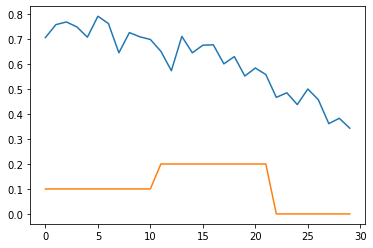

In [111]:
Z2 = hmm_remodel.predict(X)
print(Z2)
plt.plot(data22)
plt.plot(Z2/10)
plt.show()